### Apply Support Vector Machine (SVM) to the &quot;Social_Network_Ads.csv&quot; dataset for classification, and what were the key factors considered in selecting the SVM model, including preprocessing steps, kernel choice, and evaluation metrics used.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

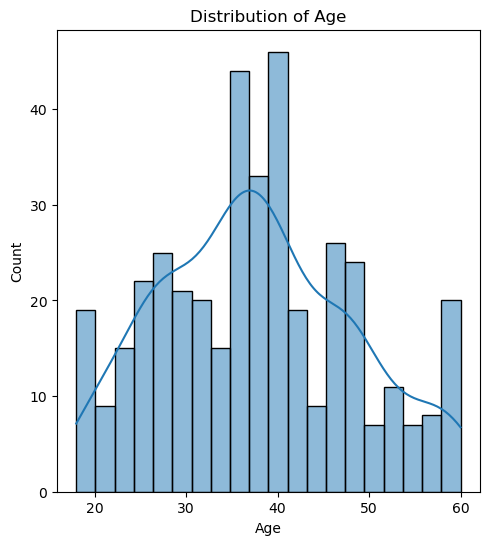

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

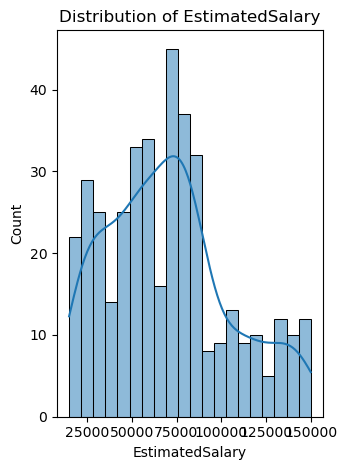

In [8]:
plt.subplot(1, 2, 2)
sns.histplot(dataset['EstimatedSalary'], bins=20, kde=True)
plt.title('Distribution of EstimatedSalary')
plt.tight_layout()
plt.show()

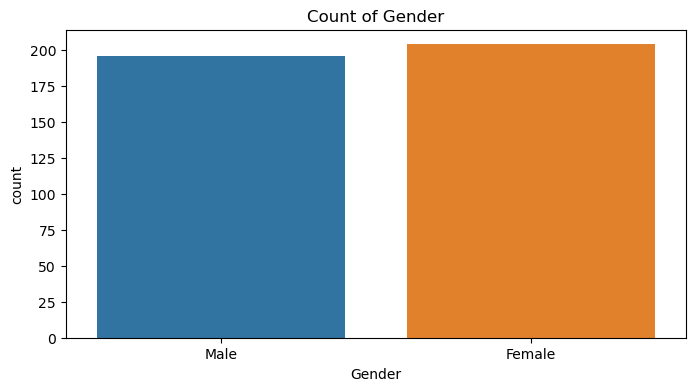

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Gender')
plt.title('Count of Gender')
plt.show()

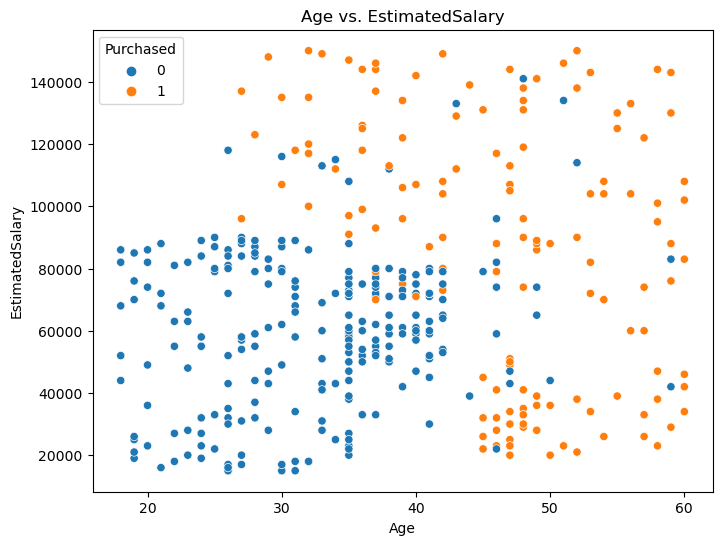

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=dataset)
plt.title('Age vs. EstimatedSalary')
plt.show()

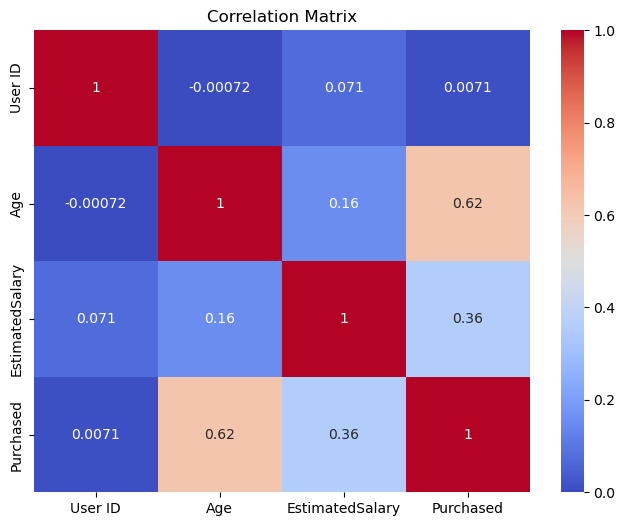

In [11]:
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

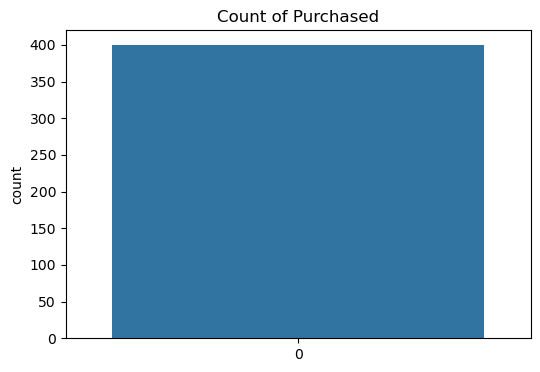

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(dataset['Purchased'])
plt.title('Count of Purchased')
plt.show()

In [13]:
purchase_percentage = (dataset['Purchased'].sum() / dataset['Purchased'].count()) * 100
print(f"Percentage of customers who made a purchase: {purchase_percentage:.2f}%")

Percentage of customers who made a purchase: 35.75%


In [14]:
# Split the dataset into features and target
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear SVM

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lin_svc = LinearSVC(max_iter=20000, dual=False)
lin_svc.fit(X_train, y_train)

# Predict the test set results
y_pred = lin_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.925


In [18]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



## Kernel SVM

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf",random_state=42)
svc.fit(X_train, y_train)

# Predict the test set results
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

